In [291]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, plot_confusion_matrix
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer


import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor

import scipy as sp

import warnings

sns.set()
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("car_dataset.csv")
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [4]:
data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [5]:
data.describe(include = "O")

,Brand,Body,Engine Type,Registration,Model
count,4345,4345,4345,4345,4345
unique,7,6,4,2,312
top,Volkswagen,sedan,Diesel,yes,E-Class
freq,936,1649,2019,3947,199


In [6]:
for p in data.columns[:-1]:
    print(f"Kolom {p} terdapat data: \n{data[p].value_counts()}\n\n")

Kolom Brand terdapat data: 
Volkswagen       936
Mercedes-Benz    921
BMW              694
Toyota           541
Renault          469
Audi             457
Mitsubishi       327
Name: Brand, dtype: int64


Kolom Price terdapat data: 
6500.0      41
8500.0      37
10500.0     36
11500.0     35
7500.0      35
            ..
124999.0     1
25700.0      1
13333.0      1
66346.0      1
81000.0      1
Name: Price, Length: 906, dtype: int64


Kolom Body terdapat data: 
sedan        1649
crossover     901
van           675
other         433
vagon         402
hatch         285
Name: Body, dtype: int64


Kolom Mileage terdapat data: 
0      185
1      127
200     89
250     78
300     75
      ... 
940      1
980      1
850      1
810      1
575      1
Name: Mileage, Length: 410, dtype: int64


Kolom EngineV terdapat data: 
2.00     709
3.00     549
2.50     350
1.60     318
2.20     294
        ... 
1.59       1
1.79       1
0.65       1
30.00      1
66.00      1
Name: EngineV, Length: 73, dtype: 

In [7]:
data.isna().sum().sort_values(ascending = False)

Price           172
EngineV         150
Brand             0
Body              0
Mileage           0
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [8]:
(data.isna().sum() / data.isna().count() * 100).sort_values(ascending = False).round(2)

Price           3.96
EngineV         3.45
Brand           0.00
Body            0.00
Mileage         0.00
Engine Type     0.00
Registration    0.00
Year            0.00
Model           0.00
dtype: float64

<AxesSubplot:>

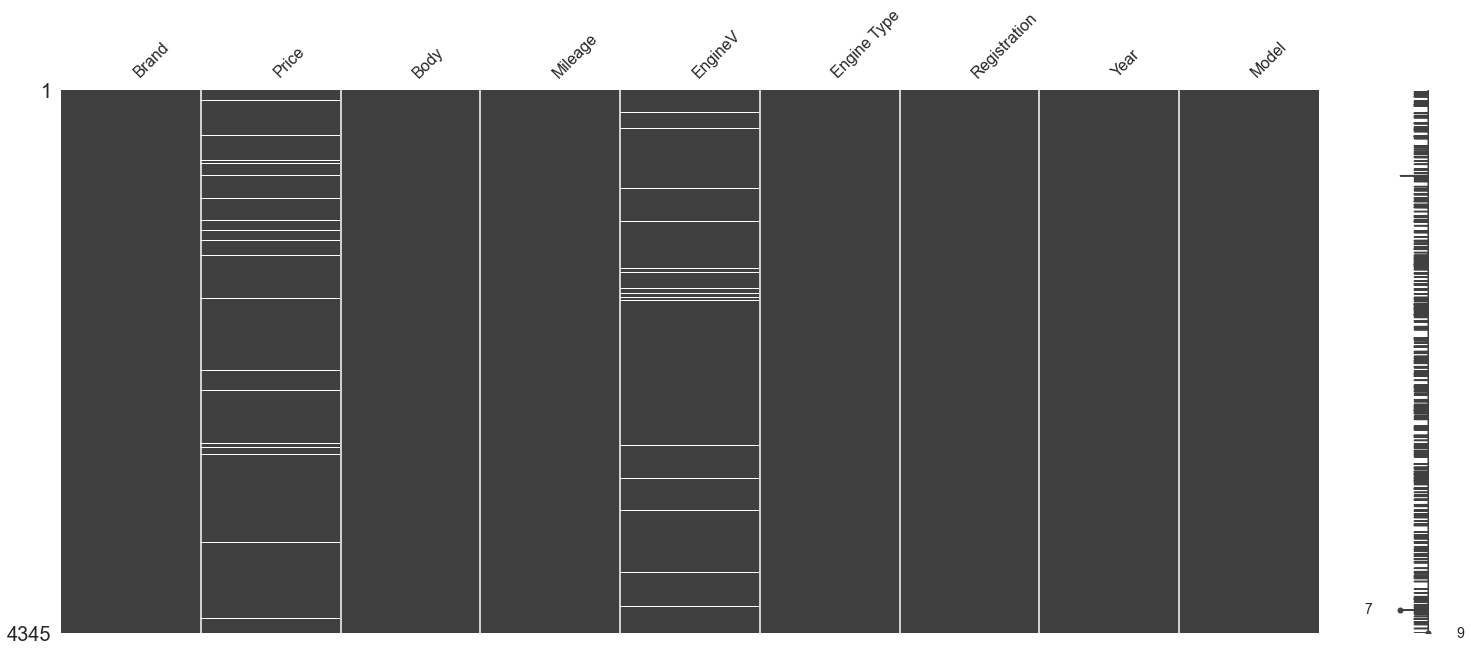

In [9]:
msno.matrix(data)

<AxesSubplot:>

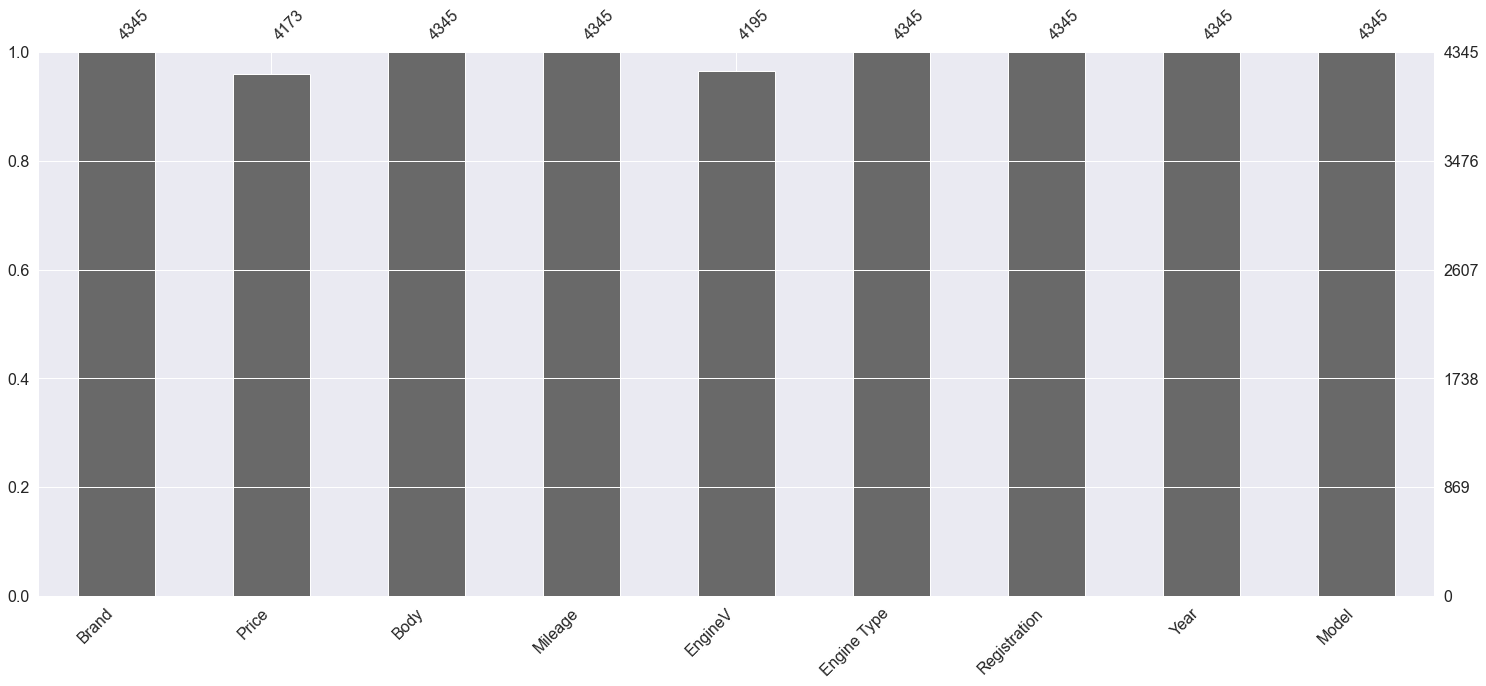

In [10]:
msno.bar(data)

<AxesSubplot:>

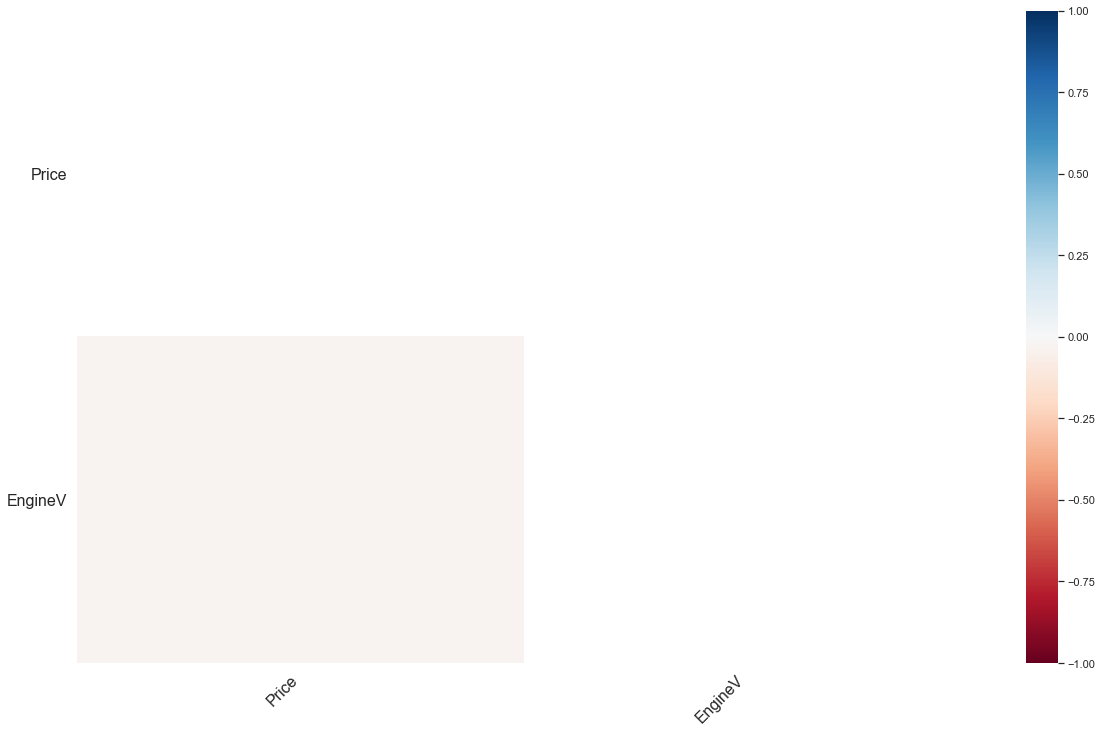

In [11]:
msno.heatmap(data)

In [12]:
indexna = data.loc[data.Price.isna() | data.EngineV.isna()].index
data.iloc[indexna]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
17,Mercedes-Benz,NaN,van,240,2.2,Diesel,yes,2007,Vito
29,Mercedes-Benz,NaN,crossover,0,4.6,Petrol,yes,2016,GLS 500
39,Audi,2500.0,sedan,180,NaN,Petrol,no,2000,A4
50,Mercedes-Benz,NaN,sedan,145,3.2,Diesel,yes,2007,E-Class
55,Mercedes-Benz,NaN,crossover,0,3.0,Diesel,yes,2016,GLS 350
...,...,...,...,...,...,...,...,...,...
4254,BMW,3500.0,sedan,280,NaN,Petrol,no,1996,730
4260,BMW,NaN,crossover,0,3.0,Diesel,yes,2015,X6
4273,Volkswagen,NaN,other,197,2.0,Diesel,no,2011,T5 (Transporter)
4305,BMW,NaN,crossover,1,3.0,Diesel,yes,2014,X6


In [13]:
data.dropna(inplace = True)
data.reset_index(drop = True, inplace = True)

In [14]:
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4020,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4021,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4022,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4023,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520


In [15]:
data.duplicated().sum()

50

In [16]:
((data.duplicated().sum() / data.duplicated().count()) * 100).round(2)

1.24

In [17]:
data.loc[data.duplicated()]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
321,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,yes,2016,GLS 63
557,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,yes,2016,GLS 63
1078,BMW,47000.0,other,5,2.00,Petrol,yes,2014,Z4
1456,Volkswagen,24900.0,sedan,1,1.60,Diesel,yes,2016,Jetta
1782,BMW,75555.0,sedan,30,4.40,Petrol,yes,2014,550
1796,Mercedes-Benz,20400.0,sedan,190,1.80,Gas,yes,2011,E-Class
1857,Mercedes-Benz,47600.0,van,0,2.20,Diesel,yes,2016,Vito
1885,Mitsubishi,15900.0,crossover,180,3.00,Gas,yes,2008,Pajero Wagon
1892,Mercedes-Benz,47600.0,van,0,2.20,Diesel,yes,2016,Vito
2200,Audi,39999.0,crossover,45,2.00,Diesel,yes,2014,Q5


In [18]:
data.drop_duplicates(inplace = True)
data.reset_index(drop = True, inplace = True)
data.loc[data.duplicated()]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model


In [19]:
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
3970,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
3971,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
3972,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
3973,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520


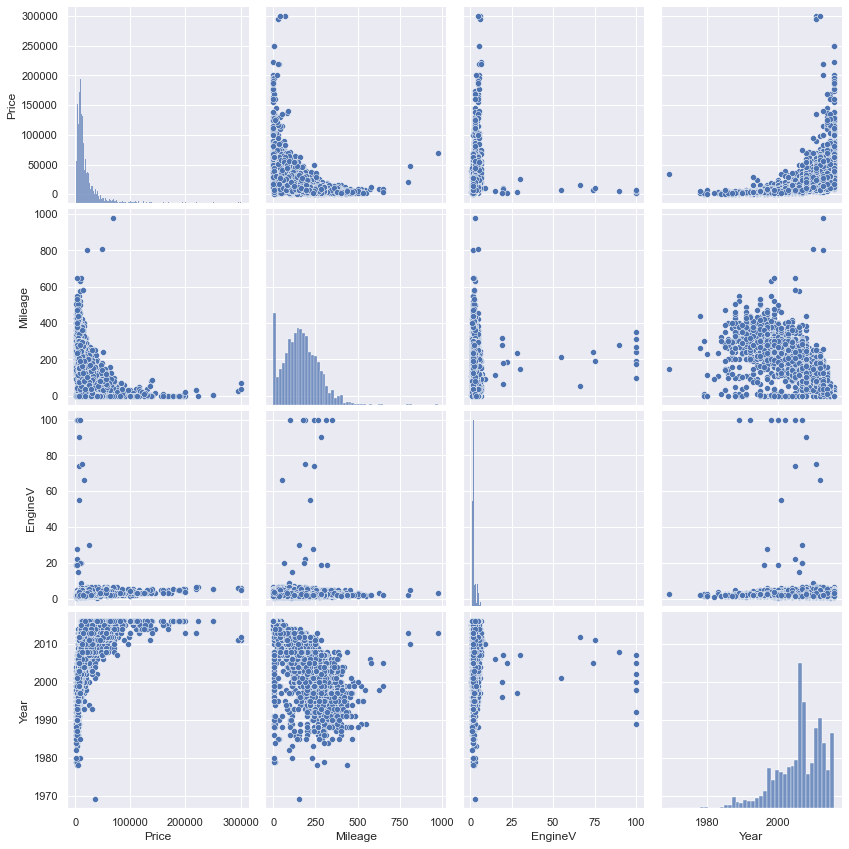

In [96]:
sns.pairplot(data, height= 3)

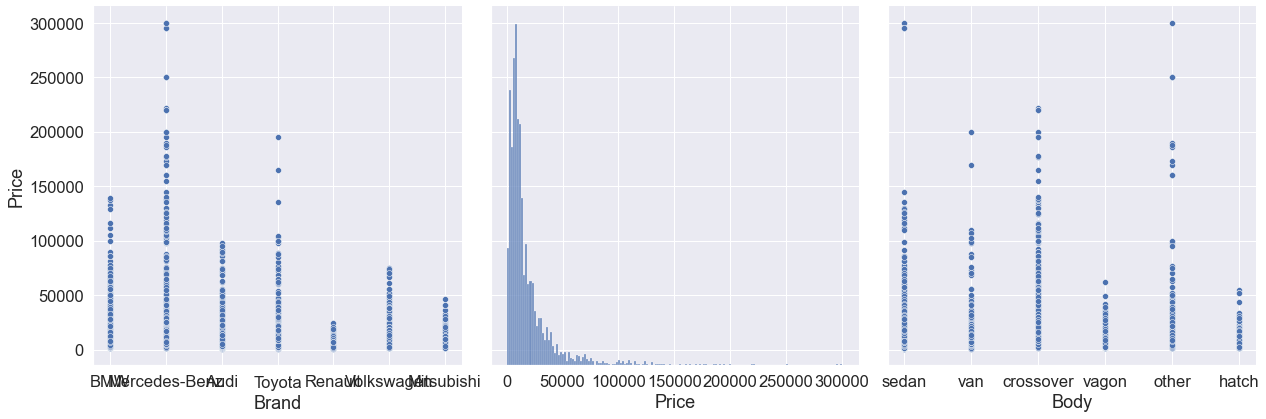

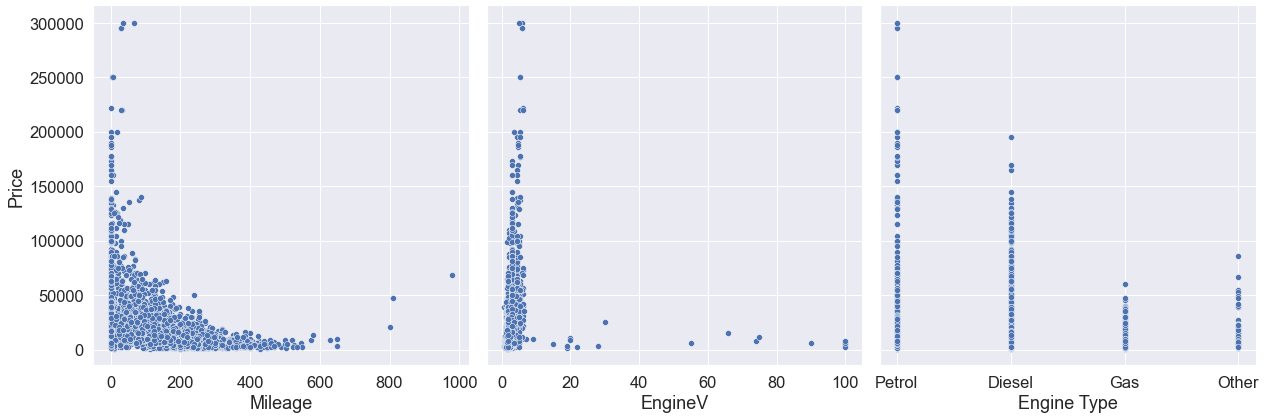

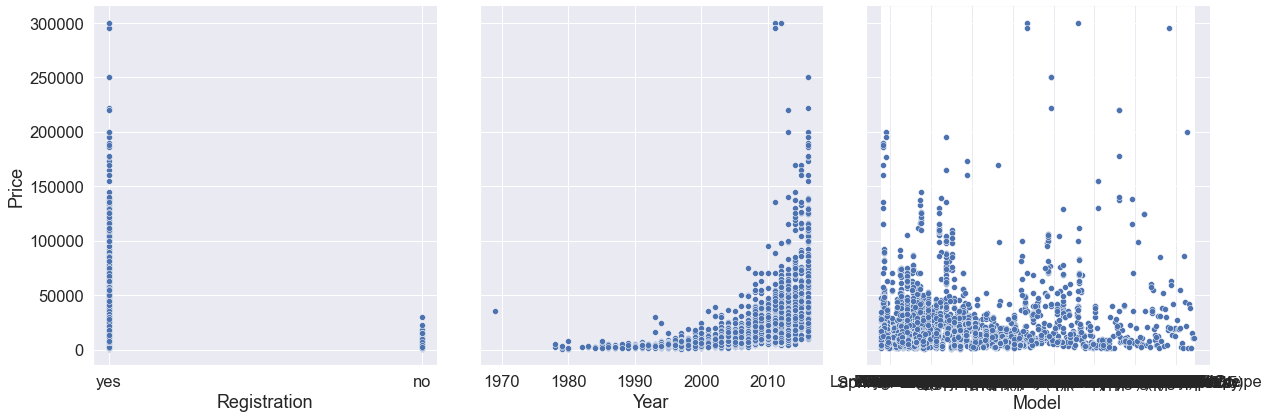

In [90]:
for i in range(0, len(data.columns), 3):
    sns.pairplot(data = data,
                x_vars=data.columns[i:i+3],
                y_vars = ["Price"], height= 6)

In [22]:
catdata = data.loc[:, data.describe(include = "O").columns]
catdata.head()

,Brand,Body,Engine Type,Registration,Model
0,BMW,sedan,Petrol,yes,320
1,Mercedes-Benz,van,Diesel,yes,Sprinter 212
2,Mercedes-Benz,sedan,Gas,yes,S 500
3,Audi,crossover,Petrol,yes,Q7
4,Toyota,crossover,Petrol,yes,Rav 4


In [23]:
catdata.describe(include = "O")

,Brand,Body,Engine Type,Registration,Model
count,3975,3975,3975,3975,3975
unique,7,6,4,2,306
top,Volkswagen,sedan,Diesel,yes,E-Class
freq,871,1518,1832,3604,181


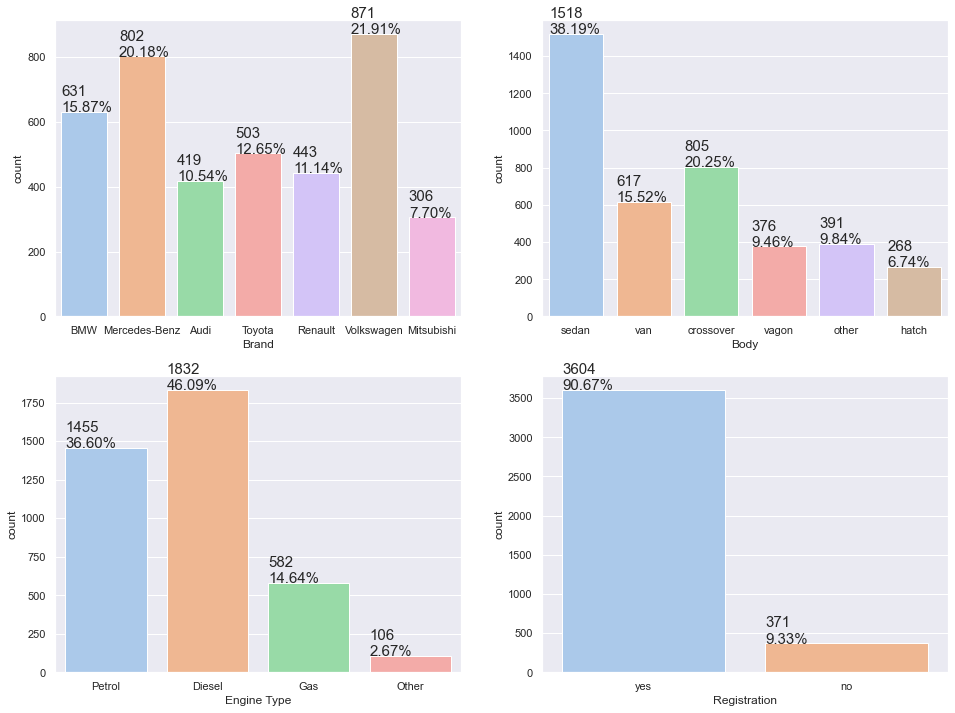

In [203]:
fig, axes = plt.subplots(2, 2, figsize = (16, 12))

plt.rcParams.update({"font.size" : 15})

for i, ax in enumerate(fig.axes):
    if i < len(catdata.columns) - 1:
        plot = sns.countplot(data = catdata, x = catdata.columns[i], ax = ax, palette= "pastel")
        for p in plot.patches:
            plot.annotate("{:.0f}\n{:.2f}%".format( p.get_height(), (p.get_height() / catdata.shape[0] * 100) ), 
                          (p.get_x(), p.get_height()) )

In [25]:
numdata = data.loc[:, (data.describe().columns)]
numdata.head()

,Price,Mileage,EngineV,Year
0,4200.0,277,2.0,1991
1,7900.0,427,2.9,1999
2,13300.0,358,5.0,2003
3,23000.0,240,4.2,2007
4,18300.0,120,2.0,2011


In [26]:
numdata.describe()

,Price,Mileage,EngineV,Year
count,3975.000000,3975.000000,3975.000000,3975.000000
mean,19056.936091,164.820126,2.763643,2006.290063
std,24976.141632,103.117252,4.965189,6.683223
min,600.000000,0.000000,0.600000,1969.000000
25%,6950.000000,92.000000,1.800000,2002.000000
50%,11400.000000,159.000000,2.200000,2007.000000
75%,21317.500000,230.000000,3.000000,2011.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [27]:
numdata.skew()

Price       4.573432
Mileage     0.704021
EngineV    17.066126
Year       -0.961880
dtype: float64

In [28]:
numdata.kurtosis()

Price       31.322790
Mileage      1.849808
EngineV    312.668005
Year         0.999965
dtype: float64

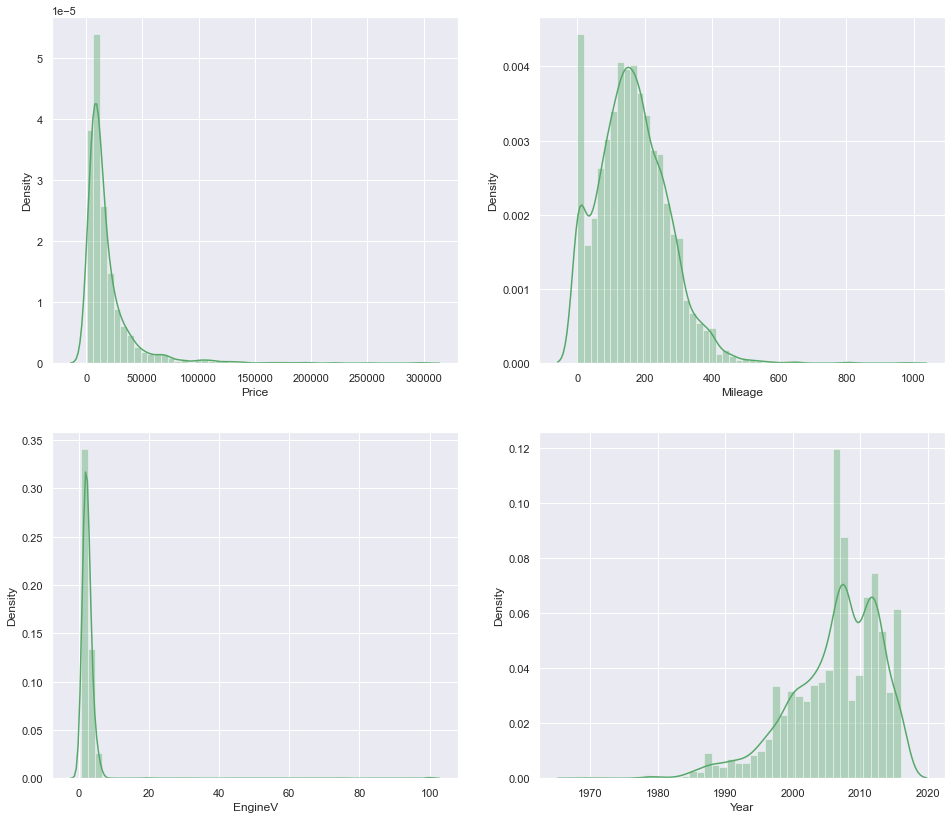

In [111]:
fig, axes = plt.subplots(2, 2, figsize = (16,14))

for i, ax in enumerate(fig.axes):
    namakolom = numdata.columns[i]
    sns.distplot(numdata[namakolom], ax = ax, color= 'g')

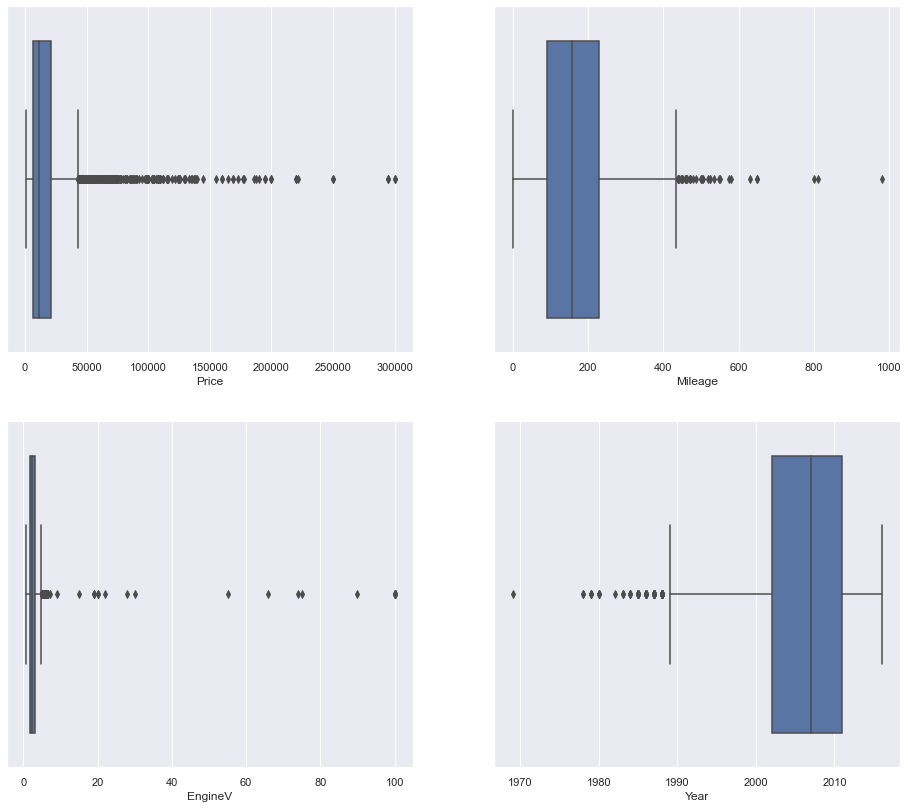

In [30]:
fig, axes = plt.subplots(2, 2, figsize = (16,14))

for i, ax in enumerate(fig.axes):
    kolom = data.describe().columns[i]
    sns.boxplot(data = data, x = kolom, ax = ax)

In [31]:
for kolom in numdata.columns[:-1]:
    print(f"kolom {kolom}: \n{numdata[kolom].sort_values(ascending = False).head(15)}\n")

kolom Price: 
3949    300000.0
1595    300000.0
2896    295000.0
3757    295000.0
2066    250000.0
2013    249999.0
1853    222000.0
3340    219900.0
3707    219900.0
3597    200000.0
5       199999.0
118     195000.0
405     195000.0
2438    189999.0
3331    187555.0
Name: Price, dtype: float64

kolom Mileage: 
2391    980
3320    810
2833    800
3165    650
2950    650
1668    630
3003    580
2276    575
1287    550
832     547
3326    535
2106    525
2289    523
1112    520
2943    505
Name: Mileage, dtype: int64

kolom EngineV: 
859     99.99
2852    99.99
3336    99.99
1216    99.99
2163    99.99
1173    99.99
238     99.99
1997    90.00
2913    75.00
1755    74.00
1930    66.00
1320    55.00
1103    30.00
1117    28.00
1177    22.00
Name: EngineV, dtype: float64



In [32]:
data_cleaning = data.copy()
data_cleaning.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [33]:
mask1 = data_cleaning.Price < data_cleaning.Price.quantile(0.99)
mask2 = data_cleaning.Mileage < data_cleaning.Mileage.quantile(0.99)
mask3 = data_cleaning.EngineV < 6.5

data_cleaning = data_cleaning.loc[(mask1 & mask2 & mask3)]
data_cleaning

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
3969,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter)
3970,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
3972,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
3973,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520


In [34]:
data_cleaning.reset_index(drop = True, inplace = True)

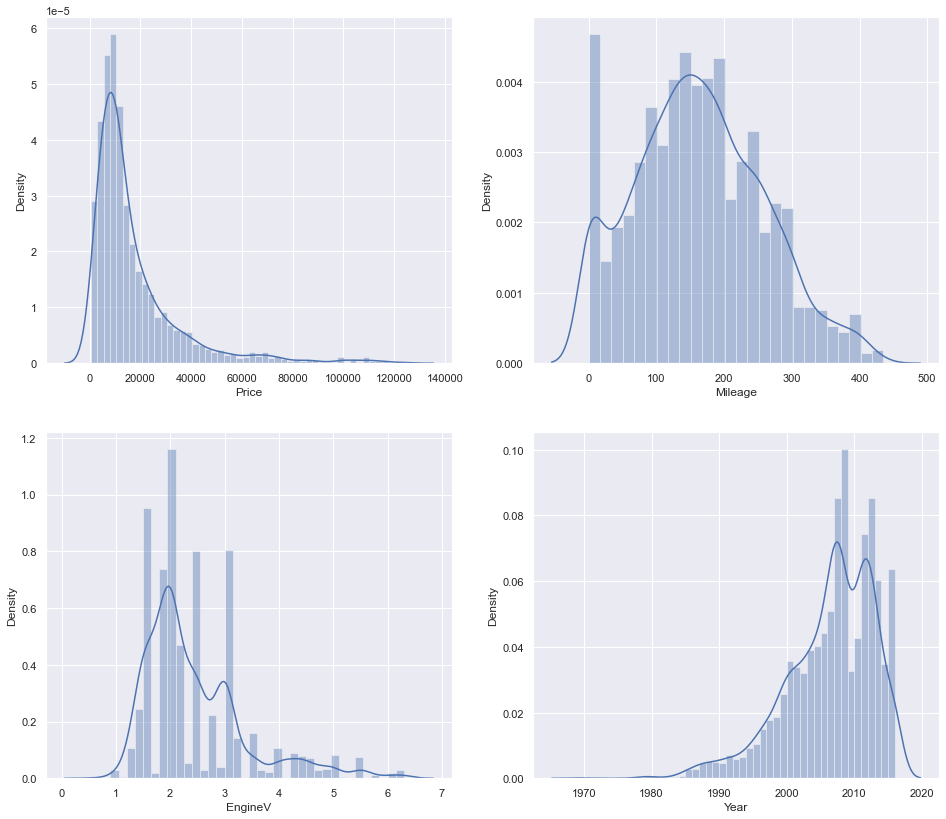

In [35]:
fig, axes = plt.subplots(2, 2, figsize = (16 ,14))

for i, ax in enumerate(fig.axes):
    kolom = data_cleaning.describe().columns[i]
    sns.distplot(data_cleaning[kolom], ax = ax)

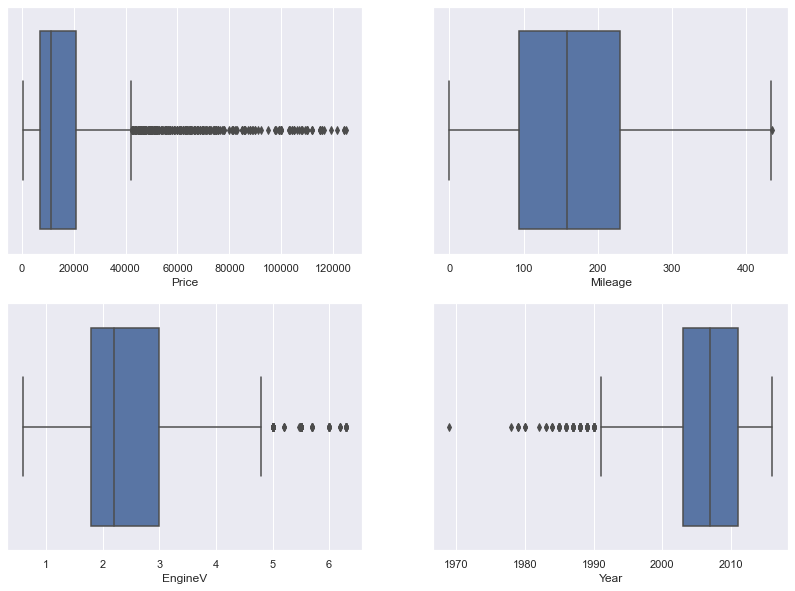

In [36]:
fig, axes = plt.subplots(2,2, figsize = (14, 10))

for i, ax in enumerate(fig.axes):
    kolom = data_cleaning.describe().columns[i]
    sns.boxplot(data = data_cleaning, x = kolom, ax = ax)

In [37]:
data_cleaning.skew()

Price      2.627793
Mileage    0.265680
EngineV    1.499229
Year      -0.975907
dtype: float64

In [38]:
data_cleaning.kurtosis()

Price      8.397423
Mileage   -0.413231
EngineV    2.382446
Year       1.079691
dtype: float64

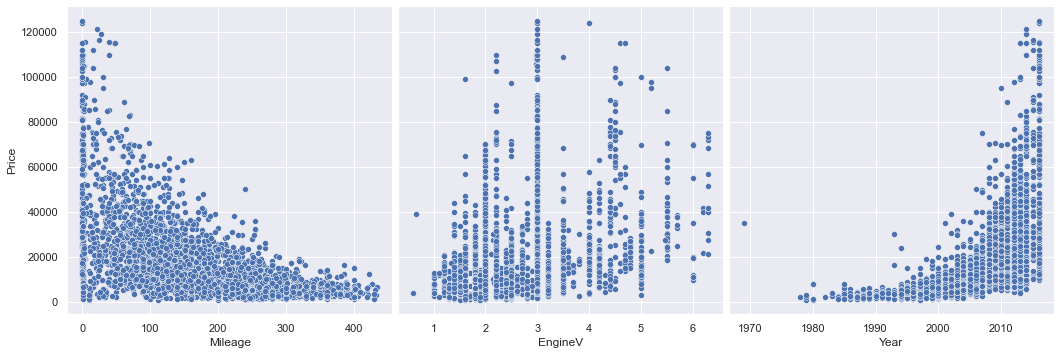

In [39]:
sns.pairplot(data = data_cleaning, 
             x_vars=data_cleaning.describe().columns[1:],
             y_vars=["Price"], height= 5)

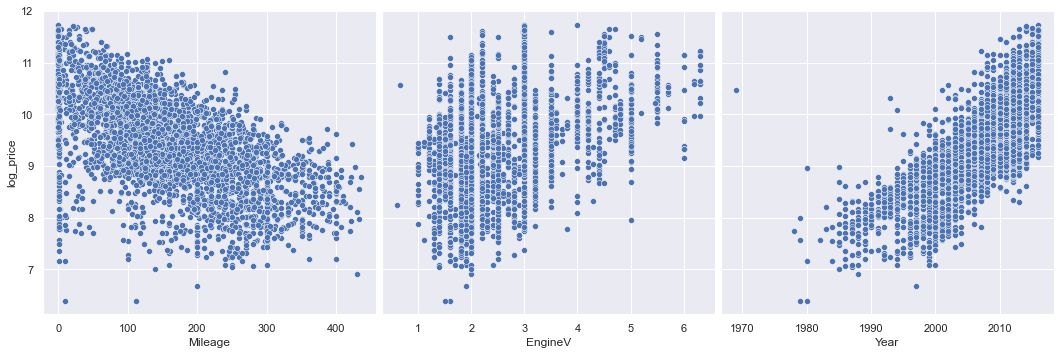

In [40]:
data_cleaning["log_price"] = np.log(data_cleaning.Price)

sns.pairplot(data = data_cleaning,
             x_vars= data_cleaning.describe().columns[1:4],
             y_vars= ["log_price"], height= 5)

In [41]:
data_cleaning.drop(["Price"], axis = "columns", inplace = True)

In [42]:
data_cleaning

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...
3865,Volkswagen,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
3866,Toyota,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
3867,BMW,sedan,1,3.5,Petrol,yes,1999,535,8.779557
3868,BMW,sedan,194,2.0,Petrol,yes,1985,520,8.987197


In [119]:
data_cleaning.iloc[:, : ].corr().log_price.sort_values(ascending = False)

log_price    1.000000
Year         0.746227
EngineV      0.415255
Mileage     -0.594542
Name: log_price, dtype: float64

<AxesSubplot:>

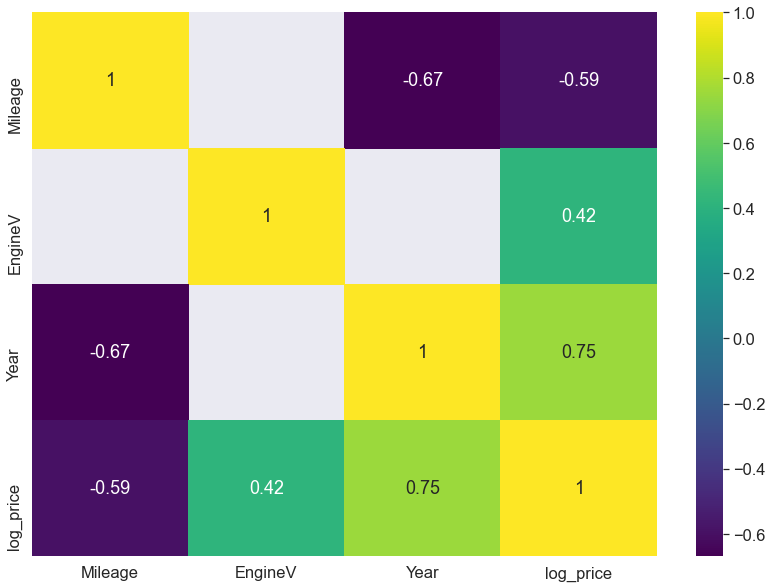

In [120]:
plt.figure(figsize = (14,10))

corr = data_cleaning.corr()

sns.set(font_scale = 1.5)
sns.heatmap(corr[(corr > 0.4) | (corr < -0.4)], annot = True, cmap = "viridis")

In [45]:
data_cleaning

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...
3865,Volkswagen,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
3866,Toyota,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
3867,BMW,sedan,1,3.5,Petrol,yes,1999,535,8.779557
3868,BMW,sedan,194,2.0,Petrol,yes,1985,520,8.987197


In [46]:
data_num = data_cleaning.loc[:, ['Mileage', 'EngineV', 'Year']]

In [121]:
vif = pd.DataFrame(data = { "VIF" : [variance_inflation_factor(data_num.values, i) for i in range (data_num.shape[1])],
                            "Kolom" : data_num.columns} )
vif

,VIF,Kolom
0,3.858250,Mileage
1,7.662153,EngineV
2,10.400737,Year


In [49]:
data_cleaning.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656


In [50]:
data_non_multicolineartiy = data_cleaning.copy()
data_non_multicolineartiy.drop(["Model"], axis = "columns", inplace = True)
data_non_multicolineartiy.drop(["Year"], axis = "columns", inplace = True)

data_non_multicolineartiy

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3865,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3866,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3867,BMW,sedan,1,3.5,Petrol,yes,8.779557
3868,BMW,sedan,194,2.0,Petrol,yes,8.987197


In [51]:
data_with_dummies = pd.get_dummies(data_non_multicolineartiy, drop_first= True)
data_with_dummies

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3866,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3867,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
3868,194,2.0,8.987197,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [123]:
data_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Mileage              3870 non-null   int64  
 1   EngineV              3870 non-null   float64
 2   log_price            3870 non-null   float64
 3   Brand_BMW            3870 non-null   uint8  
 4   Brand_Mercedes-Benz  3870 non-null   uint8  
 5   Brand_Mitsubishi     3870 non-null   uint8  
 6   Brand_Renault        3870 non-null   uint8  
 7   Brand_Toyota         3870 non-null   uint8  
 8   Brand_Volkswagen     3870 non-null   uint8  
 9   Body_hatch           3870 non-null   uint8  
 10  Body_other           3870 non-null   uint8  
 11  Body_sedan           3870 non-null   uint8  
 12  Body_vagon           3870 non-null   uint8  
 13  Body_van             3870 non-null   uint8  
 14  Engine Type_Gas      3870 non-null   uint8  
 15  Engine Type_Other    3870 non-null   u

In [125]:
data_with_dummies.describe().T

,count,mean,std,min,25%,50%,75%,max
Mileage,3870.0,162.558140,95.695269,0.00000,94.000000,159.000000,230.000000,435.000000
EngineV,3870.0,2.440044,0.945539,0.60000,1.800000,2.200000,3.000000,6.300000
log_price,3870.0,9.376547,0.883862,6.39693,8.853665,9.341544,9.952278,11.736061
Brand_BMW,3870.0,0.160207,0.366845,0.00000,0.000000,0.000000,0.000000,1.000000
Brand_Mercedes-Benz,3870.0,0.193023,0.394722,0.00000,0.000000,0.000000,0.000000,1.000000
Brand_Mitsubishi,3870.0,0.078553,0.269075,0.00000,0.000000,0.000000,0.000000,1.000000
Brand_Renault,3870.0,0.112145,0.315585,0.00000,0.000000,0.000000,0.000000,1.000000
Brand_Toyota,3870.0,0.128424,0.334604,0.00000,0.000000,0.000000,0.000000,1.000000
Brand_Volkswagen,3870.0,0.220413,0.414579,0.00000,0.000000,0.000000,0.000000,1.000000
Body_hatch,3870.0,0.068475,0.252593,0.00000,0.000000,0.000000,0.000000,1.000000


### regresi

In [52]:
input_data = data_with_dummies.drop(["log_price"], axis = "columns")
data_target = data_with_dummies["log_price"]

In [225]:
scaler = StandardScaler()

In [226]:
input_scaled = scaler.fit_transform(input_data)
input_scaled

array([[ 1.19605337, -0.46544949,  2.28952735, ..., -0.16452983,
         1.32233867,  0.32123621],
       [ 2.76373154,  0.48651125, -0.43677137, ..., -0.16452983,
        -0.75623592,  0.32123621],
       [ 2.04259958,  2.70775298, -0.43677137, ..., -0.16452983,
        -0.75623592,  0.32123621],
       ...,
       [-1.68847445,  1.12115174,  2.28952735, ..., -0.16452983,
         1.32233867,  0.32123621],
       [ 0.32860479, -0.46544949,  2.28952735, ..., -0.16452983,
         1.32233867,  0.32123621],
       [-0.40297836, -0.46544949, -0.43677137, ..., -0.16452983,
        -0.75623592,  0.32123621]])

In [227]:
x_train, x_test, y_train, y_test = train_test_split(input_scaled, data_target, test_size= 0.2, random_state=42)

In [228]:
print(x_train.shape[0]/input_data.shape[0], x_test.shape[0]/input_data.shape[0])

0.8 0.2


In [229]:
regresi = LinearRegression()

In [230]:
regresi.fit(x_train, y_train)

LinearRegression()

In [231]:
yhat_test = regresi.predict(x_train)

Text(0.5, 1.0, 'PDF Residual\nCheck Normality')

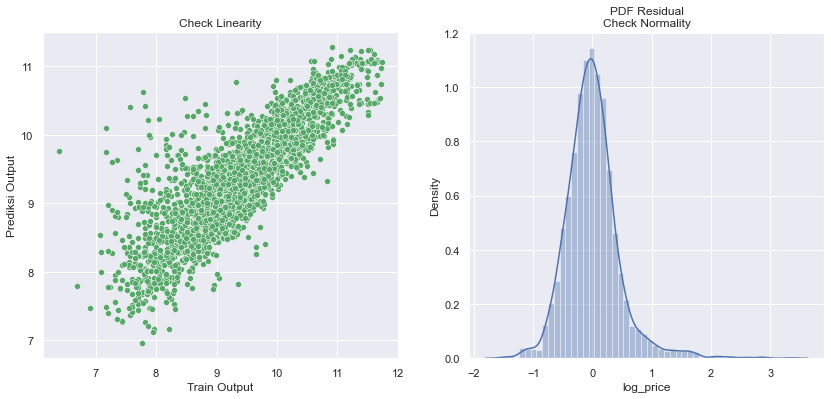

In [232]:
f = plt.figure(figsize = (14, 6))

ax = f.add_subplot(121)
sns.scatterplot(y_train, yhat_test, color = "g")
plt.xlabel("Train Output")
plt.ylabel("Prediksi Output")
plt.title("Check Linearity")


ax = f.add_subplot(122)
residual = yhat_test - y_train
sns.distplot(residual)
plt.title("PDF Residual\nCheck Normality")

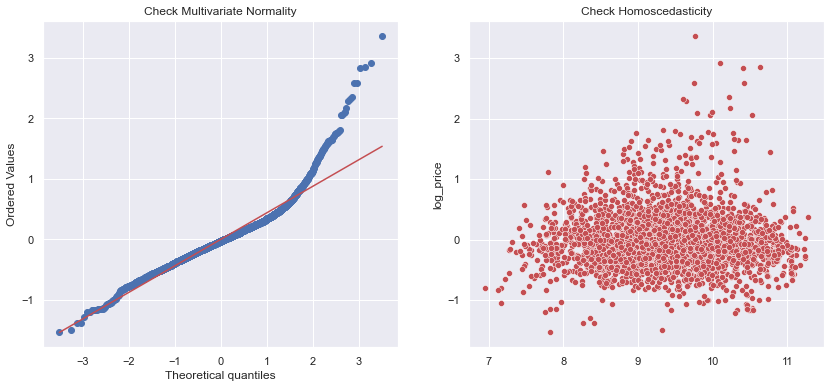

In [233]:
import scipy as sp

f, axes = plt.subplots(1,2, figsize = (14,6))

sp.stats.probplot(residual, fit = True, plot = axes[0])
axes[0].set_title("Check Multivariate Normality")

sns.scatterplot(y = residual, x = yhat_test, ax = axes[1], color = "r")
axes[1].set_title("Check Homoscedasticity")

plt.show()

In [234]:
durbin_watson(residual)

1.9446299184308589

In [235]:
# finding weights                                                                  

durbin_watson(residual)

# HASIL SANGAY BAIK, tidak mengahsilkan sebuah autocorrelaction

1.9446299184308589

In [236]:
# r score

regresi.score(x_train, y_train)

0.7284650202422233

In [237]:
# adjs r2

n = x_train.shape[0]
p = x_train.shape[1]
adjs_r2 = 1 -  ( 1 - regresi.score(x_train, y_train)) * ((n - 1) / (n - p - 1))
adjs_r2.round(3)

0.727

In [238]:
regresi.coef_.round

<function ndarray.round>

In [239]:
regresi.intercept_

9.382122430019464

In [240]:
mean_squared_error(y_test, y_pred) # variance residual

0.2520061072354439

In [241]:
np.sqrt(mean_squared_error(y_test, y_pred)) # std residual

0.502002098835696

In [242]:
mean_absolute_error(y_test, y_pred) # avg residual

0.3518519515228964

In [243]:
# VIF MODEL
vif = 1 / (1 - regresi.score(x_train, y_train))
vif.round(3)

3.683

In [244]:
pd.DataFrame(data= {"Regresi info" : ["Intercept", "R2", "Adjs R2", "Durbin-Watson Stat", "MSE", "VIF Model"],
                    "value" : [regresi.intercept_, regresi.score(x_train, y_train), 
                               adjs_r2, durbin_watson(residual) ,mean_squared_error(y_test, y_pred),
                               vif]})

,Regresi info,value
0,Intercept,9.382122
1,R2,0.728465
2,Adjs R2,0.726965
3,Durbin-Watson Stat,1.944630
4,MSE,0.252006
5,VIF Model,3.682767


In [245]:
f_stat, p_value = f_regression(x_train, y_train)

In [246]:
pd.DataFrame(data = {"Columns" : input_data.columns,
                     "Coef" : regresi.coef_.round(3) ,
                     "P_value" : p_value.round(2),
                     "F-stat" : f_stat.round(3)})

,Columns,Coef,P_value,F-stat
0,Mileage,-0.448,0.00,1697.831
1,EngineV,0.221,0.00,667.986
2,Brand_BMW,0.023,0.00,22.829
3,Brand_Mercedes-Benz,0.004,0.00,52.533
4,Brand_Mitsubishi,-0.138,0.00,18.740
5,Brand_Renault,-0.181,0.00,135.038
6,Brand_Toyota,-0.054,0.00,67.177
7,Brand_Volkswagen,-0.097,0.00,37.431
8,Body_hatch,-0.155,0.00,69.985
9,Body_other,-0.103,0.09,2.871


In [247]:
# UNTUK PEBANDINGAN HASIL MENGGUNAKAN sklearn BISA DICBA DIBANDINGKAN DENGAN MENGGUNAKAN STatsmodels

x1 = sm.add_constant(x_train)
result = sm.OLS(y_train, x1).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     485.7
Date:                Sat, 19 Mar 2022   Prob (F-statistic):               0.00
Time:                        21:19:30   Log-Likelihood:                -1958.5
No. Observations:                3096   AIC:                             3953.
Df Residuals:                    3078   BIC:                             4062.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3821      0.008   1141.358      0.000       9.366       9.398
x1            -0.4481      0.009    -48.391      0.000      -0.466      -0.430
x2             0.2209      0.010     21.352      0.000       0.201       0.241
x3             0.0228      0.012      1.851      0.064      -0.001       0.047
x4             0.0036      0.013      0.280      0.779      -0.022       0.029
x5            -0.1378      0.011    -12.661      0.000      -0.159      -0.116
x6            -0.1811      0.012    -14.858      0.000      -0.205      -0.157
x7            -0.0536      0.012     -4.464      0.000      -0.077      -0.030
x8            -0.0973      0.014     -7.116      0.000      -0.124      -0.070
x9            -0.1554      0.010    -14.823      0.000      -0.176      -0.135
x10           -0.1026      0.010    -10.049      0.000      -0.123      -0.083
x11           -0.2011      0.013    -15.988      0.000      -0.226      -0.176
x12           -0.1312      0.011    -11.863      0.000      -0.153      -0.109
x13           -0.1501      0.012    -12.241      0.000      -0.174      -0.126
x14           -0.1220      0.010    -12.255      0.000      -0.141      -0.102
x15           -0.0224      0.008     -2.654      0.008      -0.039      -0.006
x16           -0.1515      0.010    -14.531      0.000      -0.172      -0.131
x17            0.3116      0.009     33.872      0.000       0.294       0.330
==============================================================================
Omnibus:                      886.757   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4540.420
Skew:                          -1.272   Prob(JB):                         0.00
Kurtosis:                       8.360   Cond. No.                         4.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [248]:
#TESTING

In [249]:
y_pred = regresi.predict(x_test)

<AxesSubplot:xlabel='log_price', ylabel='Pred Y'>

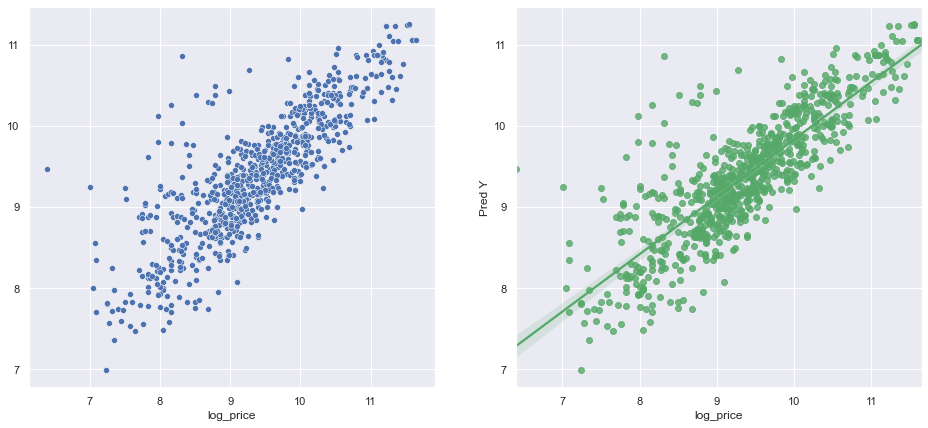

In [250]:
fig, axes = plt.subplots(1, 2, figsize = (16, 7))

sns.scatterplot(x = y_test, y = y_pred, ax= axes[0])
plt.xlabel("Test Y")
plt.ylabel("Pred Y")

sns.regplot(x = y_test, y  = y_pred, ax= axes[1], color= "g")

In [251]:
act_price = np.exp(y_test)
pred_act_price = np.exp(y_pred).round(2)

In [252]:
actprice_vs_predprice = pd.DataFrame(data = {"act_price" : act_price, "pred_price" : pred_act_price})
actprice_vs_predprice.reset_index(drop = True, inplace = True)
actprice_vs_predprice

,act_price,pred_price
0,21950.0,18317.82
1,24300.0,16580.72
2,37500.0,39069.98
3,23500.0,32024.09
4,3500.0,7484.23
...,...,...
769,11200.0,9718.76
770,20500.0,14068.70
771,13200.0,14964.07
772,3999.0,4706.96


Text(0, 0.5, 'Pred Price')

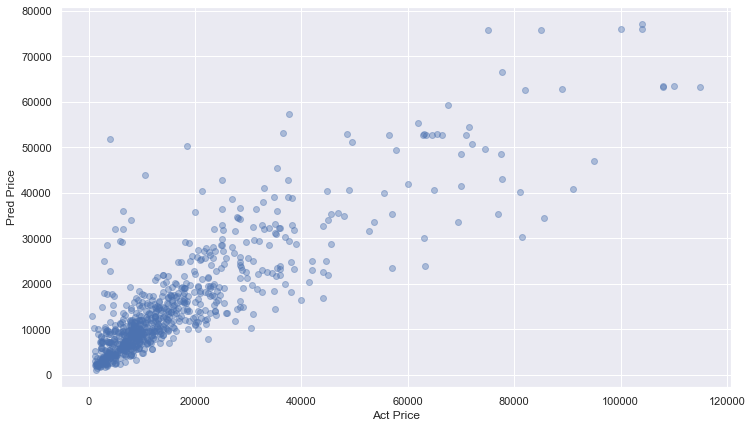

In [253]:
plt.figure(figsize = (12, 7))
plt.scatter(act_price, pred_act_price, alpha=0.4)
plt.xlabel("Act Price" )
plt.ylabel("Pred Price")

Text(0, 0.5, 'Pred Price')

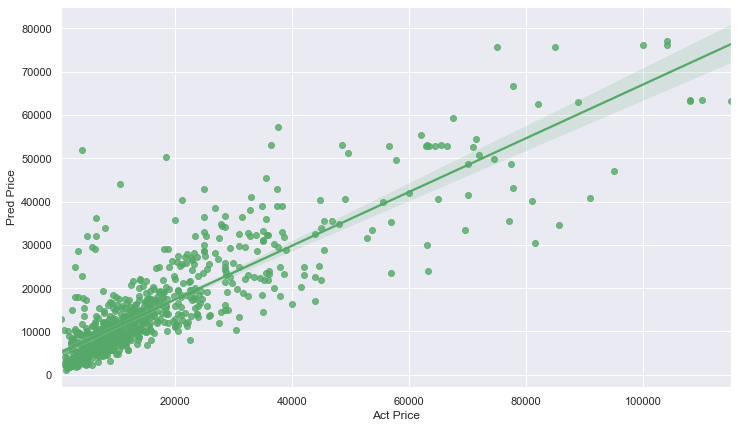

In [254]:
plt.figure(figsize = (12, 7))
sns.regplot(act_price, pred_act_price, color= "g")
plt.xlabel("Act Price" )
plt.ylabel("Pred Price")

<AxesSubplot:>

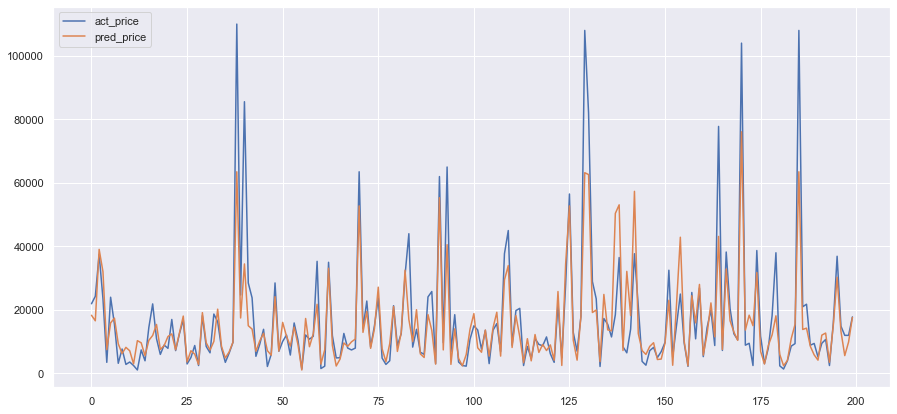

In [255]:
actprice_vs_predprice[:200].plot(figsize = (15, 7))

In [256]:
actprice_vs_predprice["diff"] = (actprice_vs_predprice.act_price - actprice_vs_predprice.pred_price).round(3)
actprice_vs_predprice["percent_diff"] = ( (actprice_vs_predprice.pred_price - actprice_vs_predprice.act_price) / actprice_vs_predprice.act_price * 100).round(3)

actprice_vs_predprice.round(2)

,act_price,pred_price,diff,percent_diff
0,21950.0,18317.82,3632.18,-16.55
1,24300.0,16580.72,7719.28,-31.77
2,37500.0,39069.98,-1569.98,4.19
3,23500.0,32024.09,-8524.09,36.27
4,3500.0,7484.23,-3984.23,113.84
...,...,...,...,...
769,11200.0,9718.76,1481.24,-13.22
770,20500.0,14068.70,6431.30,-31.37
771,13200.0,14964.07,-1764.07,13.36
772,3999.0,4706.96,-707.96,17.70


In [257]:
actprice_vs_predprice.percent_diff.idxmax(), actprice_vs_predprice.percent_diff.idxmin()

(428, 583)

In [258]:
actprice_vs_predprice.iloc[[306, 428]]

,act_price,pred_price,diff,percent_diff
306,8900.0,3228.41,5671.59,-63.726
428,600.0,12952.34,-12352.34,2058.723


In [259]:
actprice_vs_predprice.describe()

,act_price,pred_price,diff,percent_diff
count,774.000000,774.000000,774.000000,774.000000
mean,17283.081460,15691.264134,1591.817326,22.118611
std,18216.127386,13089.826145,9539.153254,122.769684
min,600.000000,1088.490000,-47739.700000,-66.310000
25%,6500.000000,7181.720000,-2185.387500,-23.955750
50%,10999.000000,11529.060000,256.000000,-3.939500
75%,21150.000000,19266.492500,3524.700000,25.160750
max,114999.000000,77102.570000,51648.880000,2058.723000


In [260]:
actprice_vs_predprice.percent_diff.median()

-3.9395

In [261]:
actprice_vs_predprice.loc[(actprice_vs_predprice.percent_diff < 2) & (actprice_vs_predprice.percent_diff > -2)].sort_values("percent_diff", ascending = False)

,act_price,pred_price,diff,percent_diff
371,10500.0,10696.78,-196.78,1.874
645,1550.0,1573.88,-23.88,1.541
265,38300.0,38869.95,-569.95,1.488
208,35500.0,35994.65,-494.65,1.393
329,32500.0,32854.47,-354.47,1.091
749,74999.0,75728.18,-729.18,0.972
407,3000.0,3019.96,-19.96,0.665
128,17900.0,18003.95,-103.95,0.581
37,9800.0,9851.47,-51.47,0.525
317,5999.0,6028.50,-29.50,0.492


# TEST SKLEARN TIPS

### TEST COLUMN TRANSFORMER

Column Transformer berguna untuk agar kita dapat memilih kolom mana yang akan dilakukan dan tidak dilakukan transform data

In [262]:
from sklearn.compose import make_column_transformer

In [263]:
input_data.head()

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [264]:
scaler = StandardScaler()

In [265]:
ct = make_column_transformer(
    (scaler, ["Mileage", "EngineV"]),
    remainder= "passthrough")

In [266]:
hasil_test_transsform = ct.fit_transform(input_data)
hasil_test_transsform

array([[ 1.19605337, -0.46544949,  1.        , ...,  0.        ,
         1.        ,  1.        ],
       [ 2.76373154,  0.48651125,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 2.04259958,  2.70775298,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.68847445,  1.12115174,  1.        , ...,  0.        ,
         1.        ,  1.        ],
       [ 0.32860479, -0.46544949,  1.        , ...,  0.        ,
         1.        ,  1.        ],
       [-0.40297836, -0.46544949,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [267]:
pd.DataFrame(hasil_test_transsform)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.196053,-0.465449,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,2.763732,0.486511,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2.042600,2.707753,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.809359,1.861566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,-0.444783,-0.465449,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865,0.004618,0.063418,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3866,-1.333134,-0.888543,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3867,-1.688474,1.121152,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3868,0.328605,-0.465449,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


### BATAS TEST COLUMN TRANSFORMER

### TEST ONEHOTENCODER DAN ORDINAL ENCODER

In [268]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [271]:
test = data.loc[:, ["Brand" , "Registration", "Engine Type"]]
test.head()

,Brand,Registration,Engine Type
0,BMW,yes,Petrol
1,Mercedes-Benz,yes,Diesel
2,Mercedes-Benz,yes,Gas
3,Audi,yes,Petrol
4,Toyota,yes,Petrol


In [280]:
ohe = OneHotEncoder(sparse= False)
ohe.fit_transform(test[["Brand"]])

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [288]:
oe = OrdinalEncoder(categories= [ ["yes", "no"], ['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi']])
oe.fit_transform(test[["Registration", "Brand"]])

array([[0., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 5.]])

In [289]:
import scipy as sp

In [290]:
sp.stats.uniform(scale = 1)

In [293]:
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

In [297]:
cross_val_score(regresi, x_test, y_test, cv=10)

array([0.74102879, 0.76022591, 0.71991512, 0.54644102, 0.81737344,
       0.66240545, 0.58082019, 0.63044486, 0.68958092, 0.78516558])

In [298]:
cross_val_predict(regresi, x_test, y_test)

array([ 9.78418906,  9.54583567, 10.51977026, 10.4266901 ,  9.03483966,
        9.71180399,  9.95278342,  8.95471357,  8.84631396,  8.91935693,
        8.73891786,  8.06699338,  9.03923848,  9.04094027,  8.61296167,
        9.20347078,  9.32930543,  9.55069152,  8.91458291,  9.07864329,
        9.1335707 ,  9.61180433,  8.88801095,  9.56125312,  9.57775833,
        8.18428617,  8.83361206,  8.67461593,  8.05332454,  9.9700184 ,
        9.36154219,  8.76235958,  9.40458195,  9.9730805 ,  9.09484503,
        8.53475202,  8.79094306,  9.27321133, 10.97019135,  9.78453026,
       10.34377804,  9.71559697,  9.4161997 ,  8.96896704,  9.29860736,
        9.32086967,  8.73310985,  8.71232832,  9.91503863,  8.93762938,
        9.46272044,  9.34233311,  9.00689589,  9.61217912,  9.20493645,
        7.05783405,  9.84304659,  9.01830595,  9.34641289,  9.89261767,
        8.08397179,  8.74336846, 10.44011624,  9.09381186,  7.76065851,
        8.68222236,  9.06395785,  8.90268368,  9.1432531 ,  9.38